In [23]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib
import math

In [24]:
print (matplotlib.__version__)

3.1.2


In [25]:
df = pd.read_csv('../data/raw/covid_19.csv', index_col=0)
df

,Country,Health.expenditures....of.GDP.,Literacy....,Physicians.density..physicians.1.000.population.,Obesity - adult prevalence rate (%),Life expectancy at birth (years),H_bed_density,Imigrate_Rate,Pop_Density,Death Rate,Recovery Rate,GDP - per capita (PPP) (US$),Unemployment rate (%)
0,Afghanistan,10.2,38.2,0.28,5.5,52.1,0.5,-0.6,54.0,0.032213,0.056022,2000.0,23.9
1,Albania,6.7,97.6,1.20,21.7,78.6,2.9,-3.3,106.0,0.050526,0.522105,12500.0,13.8
2,Algeria,6.6,80.2,1.83,27.4,77.2,1.9,-0.9,17.0,0.157488,0.333816,15200.0,11.7
3,Andorra,10.4,100.0,3.33,25.6,82.9,2.5,0.0,183.0,0.047041,0.194234,49900.0,3.7
4,Angola,2.9,71.1,0.21,8.2,60.6,NaN,0.1,24.0,0.105263,0.263158,6800.0,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,Vatican City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.250000,0.0,0.0
195,Venezuela,3.2,97.1,NaN,25.6,76.2,0.8,-1.2,35.0,0.046632,0.575130,12500.0,27.1
196,Vietnam,5.7,94.5,0.82,2.1,73.9,2.6,-0.3,293.0,0.000000,0.632959,6900.0,2.2
197,Zambia,5.4,63.4,0.09,8.1,53.0,2.0,0.0,22.0,0.044444,0.666667,4000.0,15.0


In [26]:
df.columns = ['country', 'health_expend', 'literacy', 'physicians_density', 'obesity', 'life_expect', 'h_bed_density',
              'imigrate_rate','pop_density','death_rate','recovery_rate', 'GDP', 'unemp_rate']

In [27]:
df.describe()

,health_expend,literacy,physicians_density,obesity,life_expect,h_bed_density,imigrate_rate,pop_density,death_rate,recovery_rate,GDP,unemp_rate
count,158.000000,137.000000,166.000000,165.000000,181.000000,148.000000,170.000000,170.000000,199.000000,199.000000,199.000000,199.000000
mean,6.536709,85.064234,1.910361,18.593333,73.690055,3.265541,0.315294,369.770588,0.037365,0.244887,22570.854271,8.689950
std,2.480404,18.531153,1.562519,8.990870,7.608549,2.598789,6.931363,1463.230369,0.041919,0.225250,24999.978884,10.239589
min,2.000000,19.100000,0.020000,2.100000,52.100000,0.100000,-40.300000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.600000,77.900000,0.507500,8.900000,69.600000,1.375000,-1.675000,31.500000,0.004887,0.085604,4000.000000,2.900000
50%,6.200000,94.400000,1.780000,20.600000,75.400000,2.700000,-0.200000,90.500000,0.022578,0.165580,13600.000000,5.800000
75%,7.900000,98.400000,2.897500,25.000000,78.900000,4.525000,1.700000,207.750000,0.053099,0.355731,32750.000000,10.200000
max,15.200000,100.000000,8.190000,37.900000,89.400000,13.800000,57.000000,15364.000000,0.222222,1.000000,139100.000000,77.000000


In [28]:
cols_except_health = [x for x in df.columns[~df.columns.str.contains('health')]]
print(cols_except_health)

['country', 'literacy', 'physicians_density', 'obesity', 'life_expect', 'h_bed_density', 'imigrate_rate', 'pop_density', 'death_rate', 'recovery_rate', 'GDP', 'unemp_rate']


# 1. Data Overview

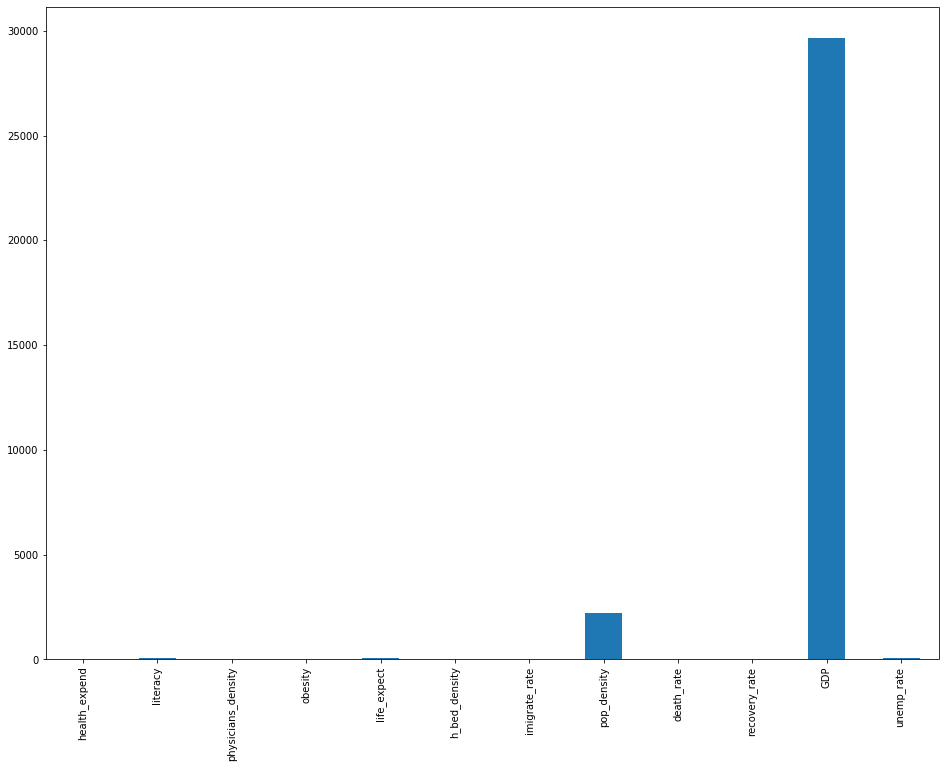

In [7]:
plt.figure(figsize=(16,12))
df_mean = df.describe().mean().plot.bar()

# 2. Data Distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a198f9c90>,
      dtype=object)

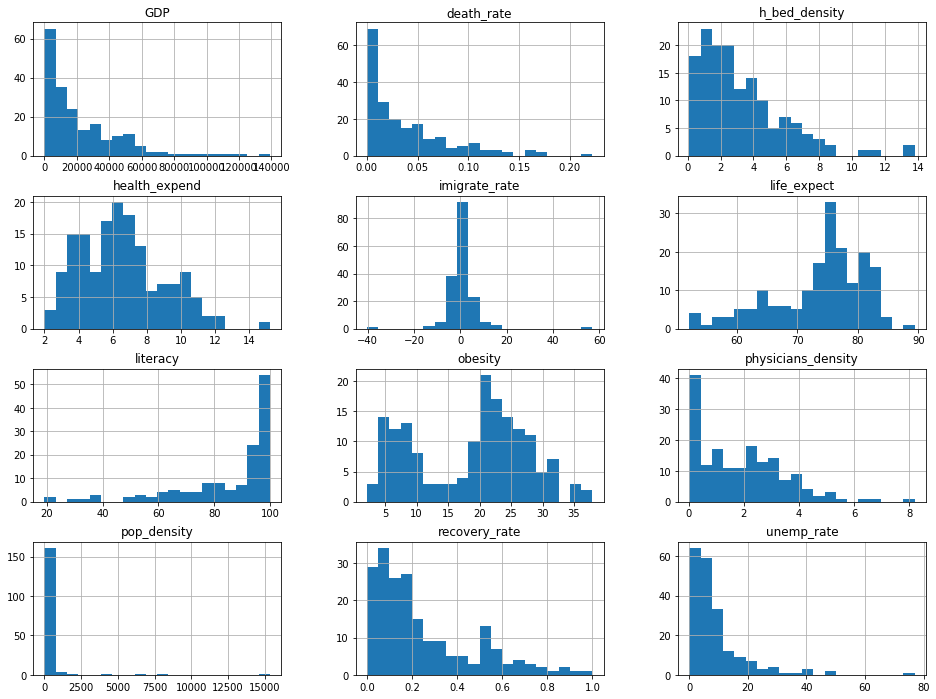

In [8]:
df.hist(figsize=(16,12), bins=20)

# 3. Correlation

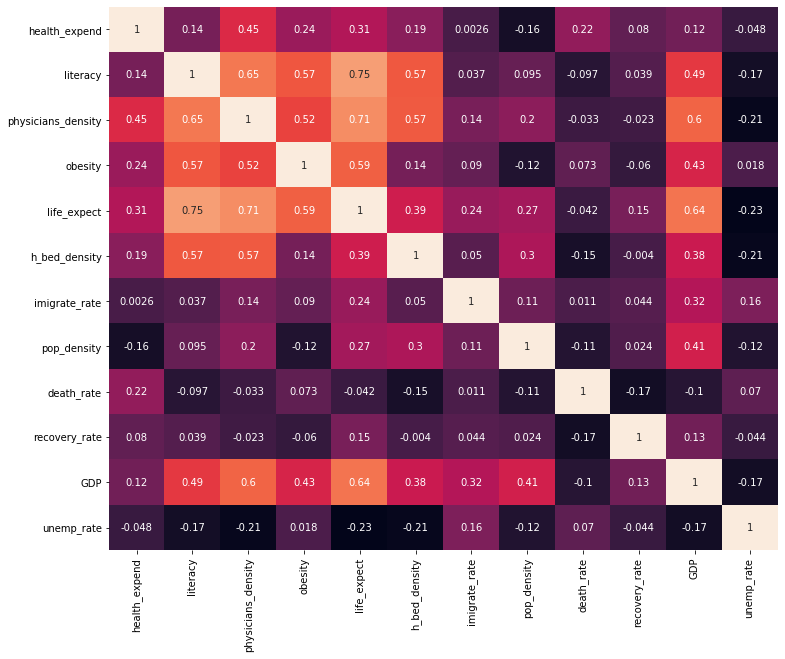

In [9]:
corr = df.corr()
plt.subplots(figsize=(12,10))
sn.heatmap(corr, annot=True, cbar=False, fmt='.2g')
plt.show()

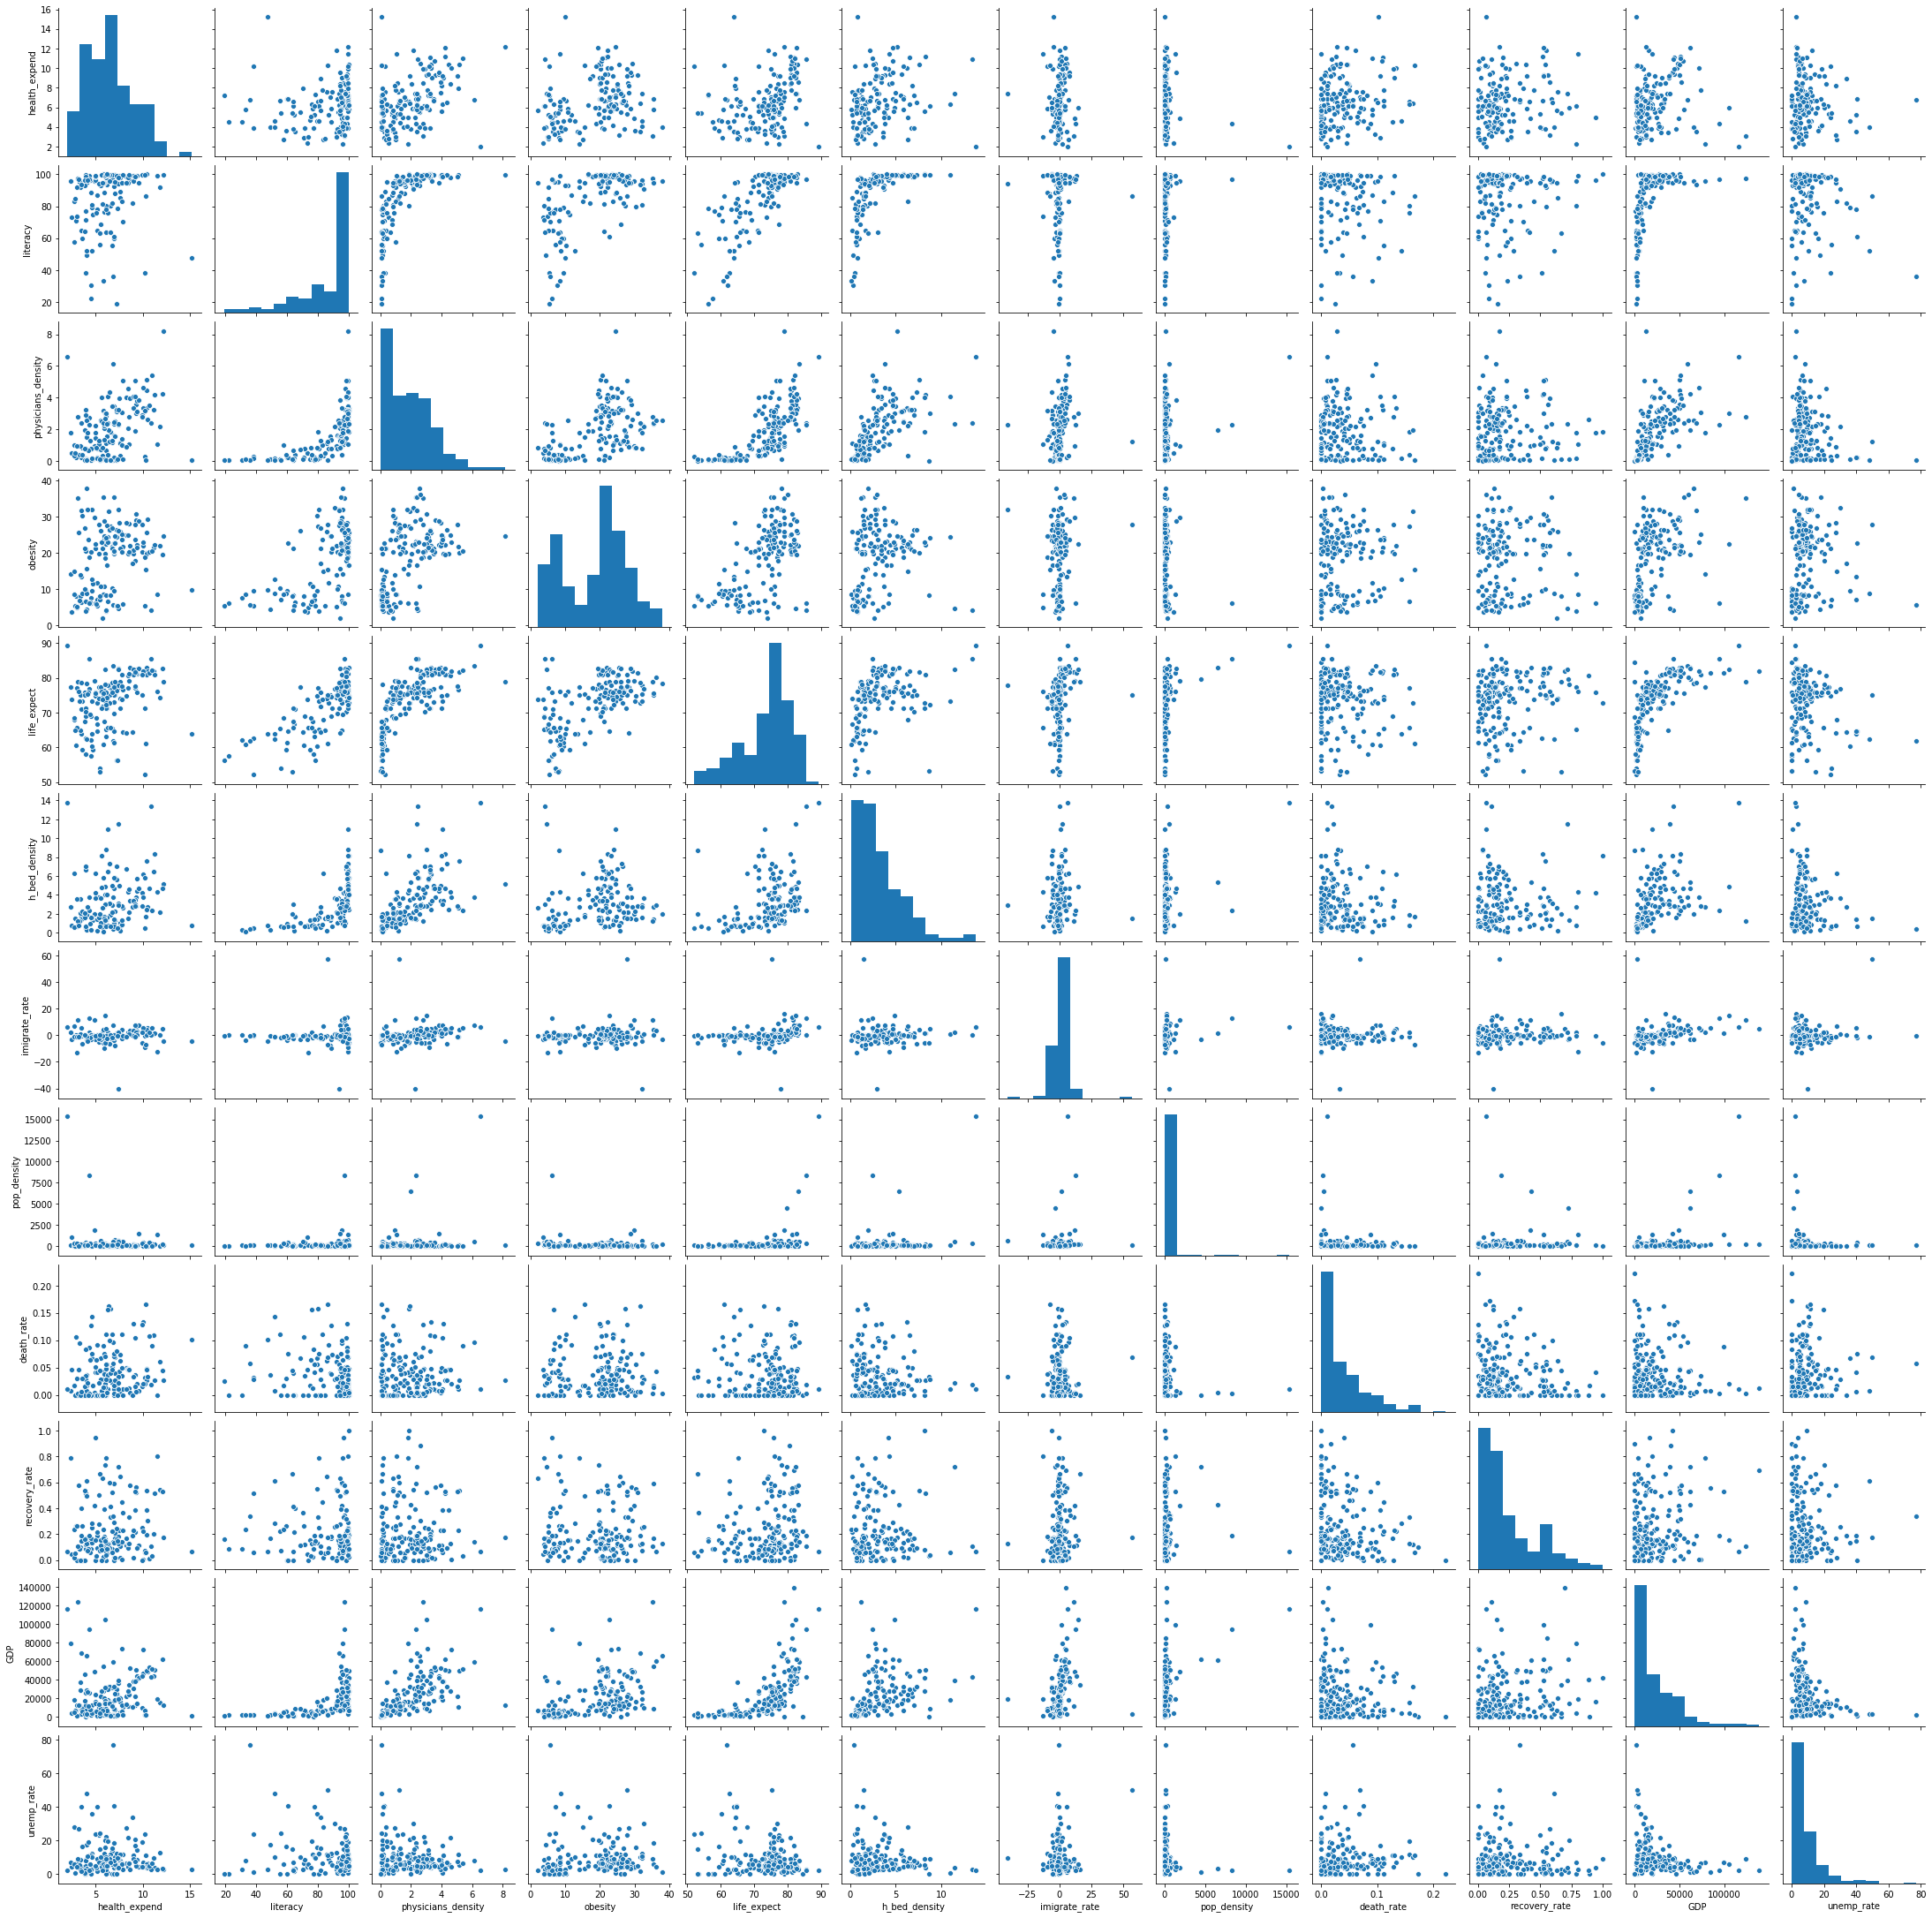

In [10]:
sn.pairplot(df)

In [11]:
df['physicians_density_cat'] = pd.qcut(df['physicians_density'],4, labels=["low","low_medium" ,"medium_high", "high"])

In [12]:
df['h_bed_density_cat'] = pd.qcut(df['h_bed_density'],4, labels=["low","low_medium" ,"medium_high", "high"])

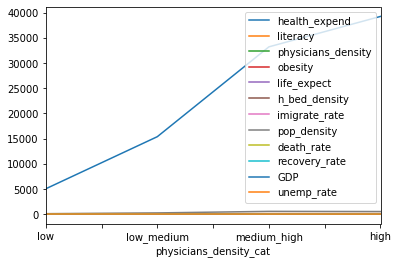

In [13]:
df.groupby(['physicians_density_cat']).mean().plot.line()

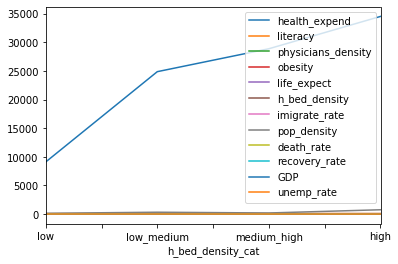

In [14]:
df.groupby(['h_bed_density_cat']).mean().plot.line()

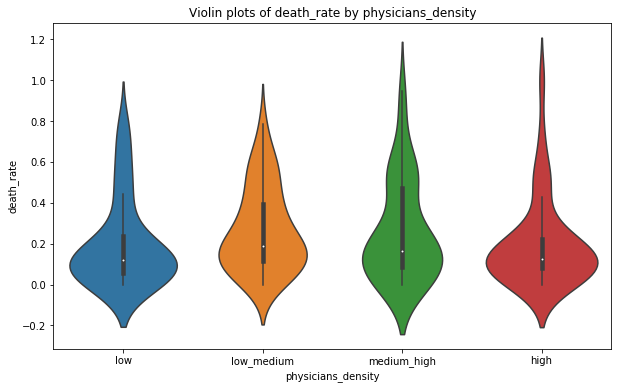

In [15]:
plt.figure(figsize=(10,6))
sn.violinplot(x='h_bed_density_cat', y='recovery_rate', data=df)
plt.title('Violin plots of death_rate by physicians_density')
plt.xlabel('physicians_density')
plt.ylabel('death_rate')
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1520: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1521: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1169: RuntimeWarning: invalid value encountered in less
  under = np.nonzero(lev < self.zmin)[0]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1171: RuntimeWarning: invalid value encountered in greater
  over = np.nonzero(lev > self.zmax)[0]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1200: RuntimeWarning: invalid value encountered in greater
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1200: RuntimeWarning: invalid value encountered in less
  inside = (self.levels > self.zmin) & (self.lev

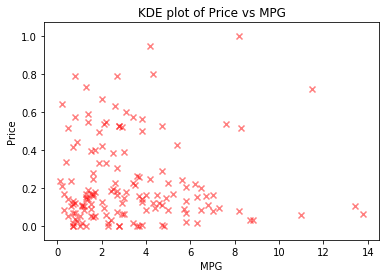

In [16]:
sn.kdeplot(df['h_bed_density'], df['recovery_rate'], cmap='magma_r')
plt.scatter(df['h_bed_density'], df['recovery_rate'], marker='x', color='r', alpha=0.5)
plt.xlabel('MPG')
plt.ylabel('Price')
plt.title('KDE plot of Price vs MPG')
plt.show()

In [38]:
# replace the NaN value with Median
df['health_expend'].fillna((df['health_expend'].median()), inplace=True)
df['literacy'].fillna((df['literacy'].median()), inplace=True)
df['physicians_density'].fillna((df['physicians_density'].median()), inplace=True)
df['obesity'].fillna((df['obesity'].median()), inplace=True)
df['life_expect'].fillna((df['life_expect'].median()), inplace=True)
df['h_bed_density'].fillna((df['h_bed_density'].median()), inplace=True)
df['imigrate_rate'].fillna((df['imigrate_rate'].median()), inplace=True)
df['pop_density'].fillna((df['pop_density'].median()), inplace=True)
df['GDP'].fillna((df['GDP'].median()), inplace=True)
df['unemp_rate'].fillna((df['unemp_rate'].median()), inplace=True)

In [37]:
# check if the column has NaN value
df['recovery_rate'].isna().sum()
# check if the dataframe has NaN value
df.isna().sum()

0

In [42]:
# export the csv file
# df.to_csv(r'/Users/yuchensu/Documents/UIUC/ClassProject/LinearModel/export_covid_19.csv', index = False, header=True)